# AI/ML Youtube Analysis for DJS-S4DS

## Problem to Address

In what other aspects can a Youtuber drive traffic to grow his channel apart from key tags and descriptive titles, as his/her channel won’t show up in the top videos after a search?

Approach: 
- Upload Time and Match it with the views on the video, to find out the best time to upload the video.
- Duration of the video can also play a key role.
- Which Category is getting the most views.

## Importing & Data Preprocessing

*Importing the libraries required and preprocessing the dataset. Removing all the unwanted columns and merging both the datasets.*

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from datetime import datetime, time, timedelta

In [3]:
channels_df = pd.read_csv('dataset_datahack_channels.csv')

In [4]:
videos_df = pd.read_csv('dataset_datahack_videos.csv')

In [5]:
channels_df.head()

,Unnamed: 0.1,Unnamed: 0,channel_id,channel_title,description,view_count,subscriber_count,video_count,created_time,uploads,other_links
0,0,0,UCn_l37ETRGxVsVqPAZM-y7w,Onkiify,Ahoy! Gamers What is Up it's your Boi Onkiify....,1443714,4820,193,2017-05-18T17:27:05Z,UUn_l37ETRGxVsVqPAZM-y7w,['https://www.youtube.com/redirect?event=chann...
1,1,1,UCg3811K2k6ZW0T9wrUyq7UQ,Boyzz World Gaming,Sup Guys\n I'm just a Weirdo W...,761326,1690,196,2020-09-07T06:42:54.28756Z,UUg3811K2k6ZW0T9wrUyq7UQ,['https://www.youtube.com/redirect?event=chann...
2,2,2,UCO1-i4iqe_Kg0B-nwt5W0Gg,Majnu Gaming,"Hello Gamer's 😍\n\nHello Family, \nMera Name H...",290799,4690,468,2021-05-28T08:27:39.183399Z,UUO1-i4iqe_Kg0B-nwt5W0Gg,['https://www.youtube.com/redirect?event=chann...
3,3,3,UC6AhmVhClcDx2RPsFFw_fAA,SELEM YT,\nAGAR AAP LOG FREE FIRE LOVER❤️ HO TO MERA CH...,6427859,133000,339,2021-03-03T00:59:54.797482Z,UU6AhmVhClcDx2RPsFFw_fAA,[]
4,4,4,UC5v-gTzCpaY257sxx-8P_-Q,Paglaa Tech,1000 subscribers - 31/12/2021\n10000 subscribe...,17097445,147000,184,2016-05-16T16:06:36Z,UU5v-gTzCpaY257sxx-8P_-Q,[]


In [6]:
channels_df.shape

(50, 11)

In [7]:
videos_df.head()

,Unnamed: 0.1,Unnamed: 0,index,video_id,title,description,category_id,tags,duration,view_count,likes,comments,upload_time,channel_title,thumbnail,topic_categories,Comments
0,0,0,0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",PT18M59S,108078,3539,840,2023-03-10T09:32:59Z,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/-gJ1a4qzO58/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Favrt COLOUR BTAO and SUBSCRIBE krke Heart l...
1,1,1,2,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",PT3M28S,2082,74,5,2023-03-29T06:30:09Z,ChessBase India,{'url': 'https://i.ytimg.com/vi/XbIegQ5v334/de...,"['https://en.wikipedia.org/wiki/Hobby', 'https...",['Congratulations Aswath Varun.. Way to go bro...
2,2,2,5,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",PT13M28S,91801,5100,220,2023-03-26T05:16:10Z,SeeKen,{'url': 'https://i.ytimg.com/vi/bTo4s27L1Uw/de...,['https://en.wikipedia.org/wiki/Society'],"[""So nice explaining, can't express in words"",..."
3,3,3,6,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",PT12M50S,1059186,46367,1846,2023-03-04T07:45:08Z,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/iEtjePI_sqc/de...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,['I recently delivered a baby boy. He is 10 da...
4,4,4,8,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",PT16M7S,155964,6147,1163,2023-03-12T07:50:52Z,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/gSYT7WSfekk/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Pet btao and Subscribe krke Heart lelo \r IN...


In [8]:
videos_df.shape

(471, 17)

In [9]:
channels_df.isna().sum()

Unnamed: 0.1        0
Unnamed: 0          0
channel_id          0
channel_title       0
description         1
view_count          0
subscriber_count    0
video_count         0
created_time        0
uploads             0
other_links         0
dtype: int64

In [10]:
videos_df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
index                0
video_id             0
title                0
description         18
category_id          0
tags                 0
duration             0
view_count           0
likes                0
comments             0
upload_time          0
channel_title        0
thumbnail            0
topic_categories     0
Comments             0
dtype: int64

In [11]:
videos_df.dtypes

Unnamed: 0.1         int64
Unnamed: 0           int64
index                int64
video_id            object
title               object
description         object
category_id          int64
tags                object
duration            object
view_count           int64
likes                int64
comments             int64
upload_time         object
channel_title       object
thumbnail           object
topic_categories    object
Comments            object
dtype: object

In [12]:
videos_df.duration.unique()

array(['PT18M59S', 'PT3M28S', 'PT13M28S', 'PT12M50S', 'PT16M7S',
       'PT18M40S', 'PT8M10S', 'PT13M24S', 'PT8M9S', 'PT59S', 'PT1H7M59S',
       'PT48S', 'PT10M10S', 'PT13M21S', 'PT11M27S', 'PT1M38S', 'PT54S',
       'PT24M4S', 'PT16S', 'PT22S', 'PT14M10S', 'PT3M48S', 'PT12M26S',
       'PT42S', 'PT20S', 'PT8M21S', 'PT7M2S', 'PT47S', 'PT58S', 'PT27M7S',
       'PT9M27S', 'PT44S', 'PT5M49S', 'PT19M17S', 'PT1H12M27S',
       'PT13M38S', 'PT14S', 'PT6M23S', 'PT3M1S', 'PT15M39S', 'PT12M11S',
       'PT4M33S', 'PT54M41S', 'PT8M38S', 'PT45S', 'PT9M11S', 'PT8M12S',
       'PT14M59S', 'PT7M19S', 'PT5M32S', 'PT3M4S', 'PT32S', 'PT7M4S',
       'PT12M33S', 'PT1M1S', 'PT9M16S', 'PT18M6S', 'PT18M17S', 'PT8M28S',
       'PT8M25S', 'PT11M16S', 'PT19M38S', 'PT4M29S', 'PT30S', 'PT41S',
       'PT4M6S', 'PT3M49S', 'PT53S', 'PT4M8S', 'PT11M12S', 'PT13M36S',
       'PT1M32S', 'PT18M27S', 'PT1M7S', 'PT7M1S', 'PT57S', 'PT7M37S',
       'PT5M35S', 'PT8M50S', 'PT15M20S', 'PT8M43S', 'PT4M32S', 'PT1M',
       

Convert duration column to timedelta

In [13]:
videos_df['duration'] = videos_df['duration'].apply(lambda x: timedelta(seconds=sum(int(i[:-1]) * {'H': 3600, 'M': 60, 'S': 1}[i[-1]] for i in re.findall(r'\d+[HMS]', x))))

Format the duration as HH:MM:SS

In [14]:
videos_df['duration'] = videos_df['duration'].apply(lambda x: str(datetime.min + x).split(' ')[1])

In [15]:
videos_df

,Unnamed: 0.1,Unnamed: 0,index,video_id,title,description,category_id,tags,duration,view_count,likes,comments,upload_time,channel_title,thumbnail,topic_categories,Comments
0,0,0,0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",00:18:59,108078,3539,840,2023-03-10T09:32:59Z,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/-gJ1a4qzO58/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Favrt COLOUR BTAO and SUBSCRIBE krke Heart l...
1,1,1,2,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",00:03:28,2082,74,5,2023-03-29T06:30:09Z,ChessBase India,{'url': 'https://i.ytimg.com/vi/XbIegQ5v334/de...,"['https://en.wikipedia.org/wiki/Hobby', 'https...",['Congratulations Aswath Varun.. Way to go bro...
2,2,2,5,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",00:13:28,91801,5100,220,2023-03-26T05:16:10Z,SeeKen,{'url': 'https://i.ytimg.com/vi/bTo4s27L1Uw/de...,['https://en.wikipedia.org/wiki/Society'],"[""So nice explaining, can't express in words"",..."
3,3,3,6,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",00:12:50,1059186,46367,1846,2023-03-04T07:45:08Z,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/iEtjePI_sqc/de...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,['I recently delivered a baby boy. He is 10 da...
4,4,4,8,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",00:16:07,155964,6147,1163,2023-03-12T07:50:52Z,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/gSYT7WSfekk/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Pet btao and Subscribe krke Heart lelo \r IN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,466,466,742,r6C1nf_iz3o,"""Tell me about Yourself"" ka SABSE SAHI Answer","Hello Everyone, My Name is Ishaan Arora.\nI'm ...",27,"['finladder ishaan arora', 'tedx ishaan arora'...",00:00:59,2351,185,0,2023-02-21T12:57:44Z,Ishaan Arora,{'url': 'https://i.ytimg.com/vi/r6C1nf_iz3o/de...,['https://en.wikipedia.org/wiki/Knowledge'],"[""Hello Everyone, My Name is Ishaan Arora.I'm ..."
467,467,467,743,515fPTbB-2o,Is 2023 the BEST YEAR to START UP? | Antler In...,Get my new book ‘GET EPIC SHIT DONE’ here: htt...,27,"['warikoo', 'ankur warikoo', 'Ankur Warikoo mo...",00:32:10,38969,1245,182,2023-03-16T14:30:01Z,warikoo,{'url': 'https://i.ytimg.com/vi/515fPTbB-2o/de...,"['https://en.wikipedia.org/wiki/Business', 'ht...",['Get my new book ‘GET EPIC SHIT DONE’ here: h...
468,468,468,745,rJd57wSoxs8,Top 4 Reasons To Learn Personal Finance | Wome...,✔️ Invest in Knowledge: https://social.rachana...,27,"['CA Rachana Ranade', 'stock market basics', '...",00:09:00,34971,1451,80,2023-03-05T08:30:18Z,CA Rachana Phadke Ranade,{'url': 'https://i.ytimg.com/vi/rJd57wSoxs8/de...,['https://en.wikipedia.org/wiki/Society'],['I showed this video to my spouse. She is hap...
469,469,469,747,sVte67QEAvU,Mummy ka Vlog TRENDING pe le aao!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",00:13:58,584614,40702,1493,2023-03-27T06:30:41Z,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/sVte67QEAvU/de...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,['Mother-Daugher love is pure... both of you l...


In [16]:
videos_df.channel_title.value_counts()

Ishaan Arora                    15
Sambhavna Seth Entertainment    15
SELEM YT                        15
Amusing Rii                     15
Prabhat Gamer                   15
ChessBase India                 15
ANS Entertainment               15
Comedy Box R k Gautam           15
MOinsideHIT                     15
Nazar Battu                     15
Comedian Vikas Thakur           15
Paglaa Tech                     14
NeuzBoy                         14
Neon Man                        14
Gate Smashers                   14
SAURABH DAHIVADKAR              14
AG !                            14
Finance With Sharan             14
Onkiify                         14
Jenny's Lectures CS IT          14
R.G Bucket List                 13
Anime Spirit                    13
Mumbiker Nikhil                 13
CA Rachana Phadke Ranade        13
Rohan Joshi                     13
Majnu Gaming                    12
Prafull MBA CHAI WALA           11
SeeKen                          11
warikoo             

In [17]:
channels_df = channels_df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0','created_time','uploads','other_links'], axis = 1)

In [18]:
channels_df.head()

,channel_id,channel_title,description,view_count,subscriber_count,video_count
0,UCn_l37ETRGxVsVqPAZM-y7w,Onkiify,Ahoy! Gamers What is Up it's your Boi Onkiify....,1443714,4820,193
1,UCg3811K2k6ZW0T9wrUyq7UQ,Boyzz World Gaming,Sup Guys\n I'm just a Weirdo W...,761326,1690,196
2,UCO1-i4iqe_Kg0B-nwt5W0Gg,Majnu Gaming,"Hello Gamer's 😍\n\nHello Family, \nMera Name H...",290799,4690,468
3,UC6AhmVhClcDx2RPsFFw_fAA,SELEM YT,\nAGAR AAP LOG FREE FIRE LOVER❤️ HO TO MERA CH...,6427859,133000,339
4,UC5v-gTzCpaY257sxx-8P_-Q,Paglaa Tech,1000 subscribers - 31/12/2021\n10000 subscribe...,17097445,147000,184


In [19]:
channels_df.shape

(50, 6)

In [20]:
videos_df.topic_categories.unique()

array(["['https://en.wikipedia.org/wiki/Action-adventure_game', 'https://en.wikipedia.org/wiki/Action_game', 'https://en.wikipedia.org/wiki/Role-playing_video_game', 'https://en.wikipedia.org/wiki/Video_game_culture']",
       "['https://en.wikipedia.org/wiki/Hobby', 'https://en.wikipedia.org/wiki/Lifestyle_(sociology)']",
       "['https://en.wikipedia.org/wiki/Society']",
       "['https://en.wikipedia.org/wiki/Lifestyle_(sociology)']",
       "['https://en.wikipedia.org/wiki/Entertainment', 'https://en.wikipedia.org/wiki/Film']",
       "['https://en.wikipedia.org/wiki/Entertainment', 'https://en.wikipedia.org/wiki/Film', 'https://en.wikipedia.org/wiki/Television_program']",
       "['https://en.wikipedia.org/wiki/Knowledge']",
       "['https://en.wikipedia.org/wiki/Action_game', 'https://en.wikipedia.org/wiki/Video_game_culture']",
       "['https://en.wikipedia.org/wiki/Motorsport', 'https://en.wikipedia.org/wiki/Sport']",
       "['https://en.wikipedia.org/wiki/Lifestyle_(sociol

In [21]:
videos_df = videos_df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'index', 'thumbnail', 'Comments'], axis = 1)

In [22]:
videos_df.head()

,video_id,title,description,category_id,tags,duration,view_count,likes,comments,upload_time,channel_title,topic_categories
0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",00:18:59,108078,3539,840,2023-03-10T09:32:59Z,Paglaa Tech,['https://en.wikipedia.org/wiki/Action-adventu...
1,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",00:03:28,2082,74,5,2023-03-29T06:30:09Z,ChessBase India,"['https://en.wikipedia.org/wiki/Hobby', 'https..."
2,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",00:13:28,91801,5100,220,2023-03-26T05:16:10Z,SeeKen,['https://en.wikipedia.org/wiki/Society']
3,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",00:12:50,1059186,46367,1846,2023-03-04T07:45:08Z,Sambhavna Seth Entertainment,['https://en.wikipedia.org/wiki/Lifestyle_(soc...
4,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",00:16:07,155964,6147,1163,2023-03-12T07:50:52Z,Paglaa Tech,['https://en.wikipedia.org/wiki/Action-adventu...


In [23]:
videos_df.shape

(471, 12)

In [24]:
channels_df['channel_title'] = channels_df['channel_title'].astype('str')

In [25]:
videos_df['channel_title'] = videos_df['channel_title'].astype('str')

In [26]:
channels_df.dtypes

channel_id          object
channel_title       object
description         object
view_count           int64
subscriber_count     int64
video_count          int64
dtype: object

In [27]:
videos_df.dtypes

video_id            object
title               object
description         object
category_id          int64
tags                object
duration            object
view_count           int64
likes                int64
comments             int64
upload_time         object
channel_title       object
topic_categories    object
dtype: object

In [29]:
merge_df = videos_df.merge(channels_df, on = "channel_title", how = "left")

In [30]:
merge_df.head()

,video_id,title,description_x,category_id,tags,duration,view_count_x,likes,comments,upload_time,channel_title,topic_categories,channel_id,description_y,view_count_y,subscriber_count,video_count
0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",00:18:59,108078,3539,840,2023-03-10T09:32:59Z,Paglaa Tech,['https://en.wikipedia.org/wiki/Action-adventu...,UC5v-gTzCpaY257sxx-8P_-Q,1000 subscribers - 31/12/2021\n10000 subscribe...,17097445,147000,184
1,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",00:03:28,2082,74,5,2023-03-29T06:30:09Z,ChessBase India,"['https://en.wikipedia.org/wiki/Hobby', 'https...",UCIsEhwBMPkRHsEgqYAPQHsA,"ChessBase India is the ""Most Popular"" chess pl...",909271596,1170000,8777
2,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",00:13:28,91801,5100,220,2023-03-26T05:16:10Z,SeeKen,['https://en.wikipedia.org/wiki/Society'],UCfhbydY40P2Lli9HuBz8cdA,IMPROVING THE QUALITY OF OUR LIFE BY GAINING K...,295923498,3920000,444
3,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",00:12:50,1059186,46367,1846,2023-03-04T07:45:08Z,Sambhavna Seth Entertainment,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,UChZ0JmGgyOWSU-1iXxPhsVA,This is the official channel of Sambhavna Seth...,1975052135,3460000,1568
4,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",00:16:07,155964,6147,1163,2023-03-12T07:50:52Z,Paglaa Tech,['https://en.wikipedia.org/wiki/Action-adventu...,UC5v-gTzCpaY257sxx-8P_-Q,1000 subscribers - 31/12/2021\n10000 subscribe...,17097445,147000,184


In [31]:
merge_df.dtypes

video_id            object
title               object
description_x       object
category_id          int64
tags                object
duration            object
view_count_x         int64
likes                int64
comments             int64
upload_time         object
channel_title       object
topic_categories    object
channel_id          object
description_y       object
view_count_y         int64
subscriber_count     int64
video_count          int64
dtype: object

In [32]:
merge_df['upload_time'] = pd.to_datetime(merge_df['upload_time'], format='%Y-%m-%dT%H:%M:%SZ', utc=True)

In [33]:
merge_df

,video_id,title,description_x,category_id,tags,duration,view_count_x,likes,comments,upload_time,channel_title,topic_categories,channel_id,description_y,view_count_y,subscriber_count,video_count
0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",00:18:59,108078,3539,840,2023-03-10 09:32:59+00:00,Paglaa Tech,['https://en.wikipedia.org/wiki/Action-adventu...,UC5v-gTzCpaY257sxx-8P_-Q,1000 subscribers - 31/12/2021\n10000 subscribe...,17097445,147000,184
1,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",00:03:28,2082,74,5,2023-03-29 06:30:09+00:00,ChessBase India,"['https://en.wikipedia.org/wiki/Hobby', 'https...",UCIsEhwBMPkRHsEgqYAPQHsA,"ChessBase India is the ""Most Popular"" chess pl...",909271596,1170000,8777
2,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",00:13:28,91801,5100,220,2023-03-26 05:16:10+00:00,SeeKen,['https://en.wikipedia.org/wiki/Society'],UCfhbydY40P2Lli9HuBz8cdA,IMPROVING THE QUALITY OF OUR LIFE BY GAINING K...,295923498,3920000,444
3,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",00:12:50,1059186,46367,1846,2023-03-04 07:45:08+00:00,Sambhavna Seth Entertainment,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,UChZ0JmGgyOWSU-1iXxPhsVA,This is the official channel of Sambhavna Seth...,1975052135,3460000,1568
4,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",00:16:07,155964,6147,1163,2023-03-12 07:50:52+00:00,Paglaa Tech,['https://en.wikipedia.org/wiki/Action-adventu...,UC5v-gTzCpaY257sxx-8P_-Q,1000 subscribers - 31/12/2021\n10000 subscribe...,17097445,147000,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,r6C1nf_iz3o,"""Tell me about Yourself"" ka SABSE SAHI Answer","Hello Everyone, My Name is Ishaan Arora.\nI'm ...",27,"['finladder ishaan arora', 'tedx ishaan arora'...",00:00:59,2351,185,0,2023-02-21 12:57:44+00:00,Ishaan Arora,['https://en.wikipedia.org/wiki/Knowledge'],UCkOtNAT3-B2rAPEleWaytrA,College mein ho? To sahi jagah aaye ho! :)\n\n...,917729,19800,100
467,515fPTbB-2o,Is 2023 the BEST YEAR to START UP? | Antler In...,Get my new book ‘GET EPIC SHIT DONE’ here: htt...,27,"['warikoo', 'ankur warikoo', 'Ankur Warikoo mo...",00:32:10,38969,1245,182,2023-03-16 14:30:01+00:00,warikoo,"['https://en.wikipedia.org/wiki/Business', 'ht...",UCRzYN32xtBf3Yxsx5BvJWJw,"warikoo is a serial entrepreneur, a bestsellin...",214606523,2800000,861
468,rJd57wSoxs8,Top 4 Reasons To Learn Personal Finance | Wome...,✔️ Invest in Knowledge: https://social.rachana...,27,"['CA Rachana Ranade', 'stock market basics', '...",00:09:00,34971,1451,80,2023-03-05 08:30:18+00:00,CA Rachana Phadke Ranade,['https://en.wikipedia.org/wiki/Society'],UCe3qdG0A_gr-sEdat5y2twQ,To Learn Stock Market in simplified language c...,231870766,4360000,1013
469,sVte67QEAvU,Mummy ka Vlog TRENDING pe le aao!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",00:13:58,584614,40702,1493,2023-03-27 06:30:41+00:00,Sambhavna Seth Entertainment,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,UChZ0JmGgyOWSU-1iXxPhsVA,This is the official channel of Sambhavna Seth...,1975052135,3460000,1568


In [34]:
merge_df.channel_title.value_counts()

Ishaan Arora                    15
Sambhavna Seth Entertainment    15
SELEM YT                        15
Amusing Rii                     15
Prabhat Gamer                   15
ChessBase India                 15
ANS Entertainment               15
Comedy Box R k Gautam           15
MOinsideHIT                     15
Nazar Battu                     15
Comedian Vikas Thakur           15
Paglaa Tech                     14
NeuzBoy                         14
Neon Man                        14
Gate Smashers                   14
SAURABH DAHIVADKAR              14
AG !                            14
Finance With Sharan             14
Onkiify                         14
Jenny's Lectures CS IT          14
R.G Bucket List                 13
Anime Spirit                    13
Mumbiker Nikhil                 13
CA Rachana Phadke Ranade        13
Rohan Joshi                     13
Majnu Gaming                    12
Prafull MBA CHAI WALA           11
SeeKen                          11
warikoo             

## Understanding Popular Videos and Their Trends

*Finding out the most popular videos in the dataset and understanding the common trends behind the popularity of the videos*

In [40]:
popular_videos = videos_df.sort_values(by = 'view_count', ascending = False).head(20)

In [44]:
popular_videos.head(20)

,video_id,title,description,category_id,tags,duration,view_count,likes,comments,upload_time,channel_title,topic_categories
269,A1BtCtep1t4,JAVELIN THROW! Ft. SHAADI WAALE UNCLE,Download KUKUFM \nDownload link - https://kuku...,1,"['animation', 'indian animation community', 'i...",00:06:21,16541225,1081179,32213,2022-03-29T12:00:16Z,R.G Bucket List,['https://en.wikipedia.org/wiki/Video_game_cul...
368,tEvdUSyF_5I,PEN FIGHT Ft. PUFF TALKS @PuffTalks | ANIMATI...,"Hope you guys loved the video, i know tum sabh...",1,"['animated story', 'funny animation', 'rg buck...",00:08:12,13314870,672756,26241,2020-05-04T12:31:17Z,R.G Bucket List,['https://en.wikipedia.org/wiki/Entertainment'...
357,hNZ_pY2gpZ0,FIRST LOVE @YogiBabaOG,Download Winzo:\nhttps://winzo.onelink.me/VS3O...,1,"['animation', 'indian animation community', 'i...",00:09:17,13095675,915861,54074,2021-06-15T11:30:12Z,R.G Bucket List,['https://en.wikipedia.org/wiki/Entertainment'...
459,71SkYcEjk_4,Big Dreams ft. Parents @KirtiChow @RIYAGOGOI,Animation is the only thing that strikes my mi...,1,"['animation', 'indian animation community', 'i...",00:08:06,9919427,648295,28148,2020-09-30T11:30:11Z,R.G Bucket List,['https://en.wikipedia.org/wiki/Entertainment'...
195,GamaHhPc7ic,KENDRIYA VIDYALAYA IS SCARY,Register with CoinSwitch Kuber and get FREE Bi...,1,"['animation', 'indian animation community', 'i...",00:10:21,8809716,628350,26289,2021-10-17T10:00:11Z,R.G Bucket List,['https://en.wikipedia.org/wiki/Entertainment'...
184,I60Z-6z1WM8,ANGER ISSUES | ANIMATION STORY | RG BUCKET LIST,Yup!! I'm a guy with some Anger Issues !! due ...,1,"['animated story', 'funny animation', 'rg buck...",00:08:13,8214752,513811,13187,2020-06-18T11:30:35Z,R.G Bucket List,['https://en.wikipedia.org/wiki/Entertainment'...
21,2CT0SkSySEU,FIRST LOVE (Part-2) | Official trailer |@Kirti...,OST(original soundtrack) of First Love pt.2\n...,1,"['animation', 'indian animation community', 'i...",00:03:48,7491674,612755,32638,2022-09-29T10:30:13Z,R.G Bucket List,['https://en.wikipedia.org/wiki/Entertainment'...
173,wav-Zog09Z4,PEER PRESSURE FT. CRICKET | ANIMATION STORY | ...,Cricket has been a part of my life since child...,1,"['animation', 'indian animation community', 'i...",00:07:21,6965630,459259,16375,2020-07-31T11:30:10Z,R.G Bucket List,"['https://en.wikipedia.org/wiki/Cricket', 'htt..."
340,rowKH0AcZ8Q,PUBLIC TRANSPORTATION | ANIMATION VIDEO | ASSA...,"Hey guys, its been a while since I uploaded my...",1,"['Funny animation', 'assamese cartoon', 'assam...",00:07:13,3633327,196104,5937,2019-11-23T12:59:25Z,R.G Bucket List,['https://en.wikipedia.org/wiki/Entertainment'...
83,c7KwSRpi7ks,Who PAYS for the FIRST DATE?,When is the last time you were excited to swip...,27,"['Finance with sharan', 'Bitcoin', 'Bitcoin ne...",00:00:57,3518414,158514,866,2023-03-01T09:14:01Z,Finance With Sharan,['https://en.wikipedia.org/wiki/Entertainment'...


### The Category Factor

##### Here, from above, what is very clearly visible in the produced dataframe is that all the popular videos, are the follows:

- Majority of the videos in the list have a their videos in the category id of 1, which tells us that videos having the topic of Entertainment, Film, Sports like Cricket have a higher chance of getting recommended and garnering more views.
- Additionally, videos about Lifestyle, Society, Business also are very popular and gain trending status.


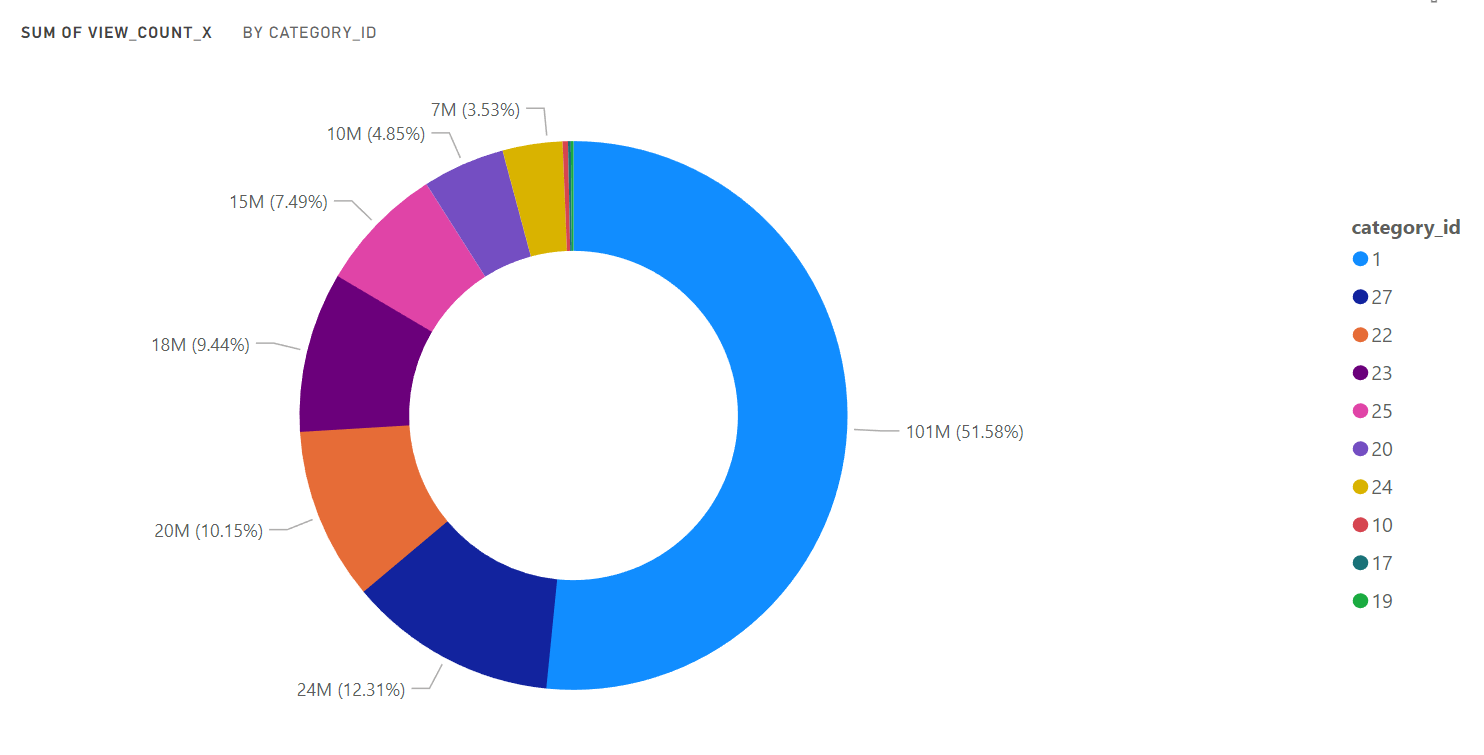

We used PowerBI to visualize using a Bar Chart that in this particular dataset, Videos having **Category 1 (Entertainment, Film, Sports)** are bound to trend and garner a lot of views.

Apart from Category 1, Category 27 & 22 (Lifestyle, Society) also seem to trend and share almost 27% of the views in total of the dataframe.

### The Duration Factor

In [45]:
popular_videos.head(20)

,video_id,title,description,category_id,tags,duration,view_count,likes,comments,upload_time,channel_title,topic_categories
269,A1BtCtep1t4,JAVELIN THROW! Ft. SHAADI WAALE UNCLE,Download KUKUFM \nDownload link - https://kuku...,1,"['animation', 'indian animation community', 'i...",00:06:21,16541225,1081179,32213,2022-03-29T12:00:16Z,R.G Bucket List,['https://en.wikipedia.org/wiki/Video_game_cul...
368,tEvdUSyF_5I,PEN FIGHT Ft. PUFF TALKS @PuffTalks | ANIMATI...,"Hope you guys loved the video, i know tum sabh...",1,"['animated story', 'funny animation', 'rg buck...",00:08:12,13314870,672756,26241,2020-05-04T12:31:17Z,R.G Bucket List,['https://en.wikipedia.org/wiki/Entertainment'...
357,hNZ_pY2gpZ0,FIRST LOVE @YogiBabaOG,Download Winzo:\nhttps://winzo.onelink.me/VS3O...,1,"['animation', 'indian animation community', 'i...",00:09:17,13095675,915861,54074,2021-06-15T11:30:12Z,R.G Bucket List,['https://en.wikipedia.org/wiki/Entertainment'...
459,71SkYcEjk_4,Big Dreams ft. Parents @KirtiChow @RIYAGOGOI,Animation is the only thing that strikes my mi...,1,"['animation', 'indian animation community', 'i...",00:08:06,9919427,648295,28148,2020-09-30T11:30:11Z,R.G Bucket List,['https://en.wikipedia.org/wiki/Entertainment'...
195,GamaHhPc7ic,KENDRIYA VIDYALAYA IS SCARY,Register with CoinSwitch Kuber and get FREE Bi...,1,"['animation', 'indian animation community', 'i...",00:10:21,8809716,628350,26289,2021-10-17T10:00:11Z,R.G Bucket List,['https://en.wikipedia.org/wiki/Entertainment'...
184,I60Z-6z1WM8,ANGER ISSUES | ANIMATION STORY | RG BUCKET LIST,Yup!! I'm a guy with some Anger Issues !! due ...,1,"['animated story', 'funny animation', 'rg buck...",00:08:13,8214752,513811,13187,2020-06-18T11:30:35Z,R.G Bucket List,['https://en.wikipedia.org/wiki/Entertainment'...
21,2CT0SkSySEU,FIRST LOVE (Part-2) | Official trailer |@Kirti...,OST(original soundtrack) of First Love pt.2\n...,1,"['animation', 'indian animation community', 'i...",00:03:48,7491674,612755,32638,2022-09-29T10:30:13Z,R.G Bucket List,['https://en.wikipedia.org/wiki/Entertainment'...
173,wav-Zog09Z4,PEER PRESSURE FT. CRICKET | ANIMATION STORY | ...,Cricket has been a part of my life since child...,1,"['animation', 'indian animation community', 'i...",00:07:21,6965630,459259,16375,2020-07-31T11:30:10Z,R.G Bucket List,"['https://en.wikipedia.org/wiki/Cricket', 'htt..."
340,rowKH0AcZ8Q,PUBLIC TRANSPORTATION | ANIMATION VIDEO | ASSA...,"Hey guys, its been a while since I uploaded my...",1,"['Funny animation', 'assamese cartoon', 'assam...",00:07:13,3633327,196104,5937,2019-11-23T12:59:25Z,R.G Bucket List,['https://en.wikipedia.org/wiki/Entertainment'...
83,c7KwSRpi7ks,Who PAYS for the FIRST DATE?,When is the last time you were excited to swip...,27,"['Finance with sharan', 'Bitcoin', 'Bitcoin ne...",00:00:57,3518414,158514,866,2023-03-01T09:14:01Z,Finance With Sharan,['https://en.wikipedia.org/wiki/Entertainment'...


Here, we can notice that the duration of the videos stay very consistent in the top 20 videos based on views, have a **duration (length of the video) consistently below the 10 minute mark**, rarely having some outliers which also are under the 15 minute mark.

This signifies that, based on recent studies, the general audience prefer to watch videos of shorter length, as over time, the attention span of the users has been decreasing drastically.

**This shows us that people prefer to watch shorter form content over anything.**

Making hour long videos is a lot of effort the content creator, but may not always bring the best fortunes for them.

### The Upload Factor

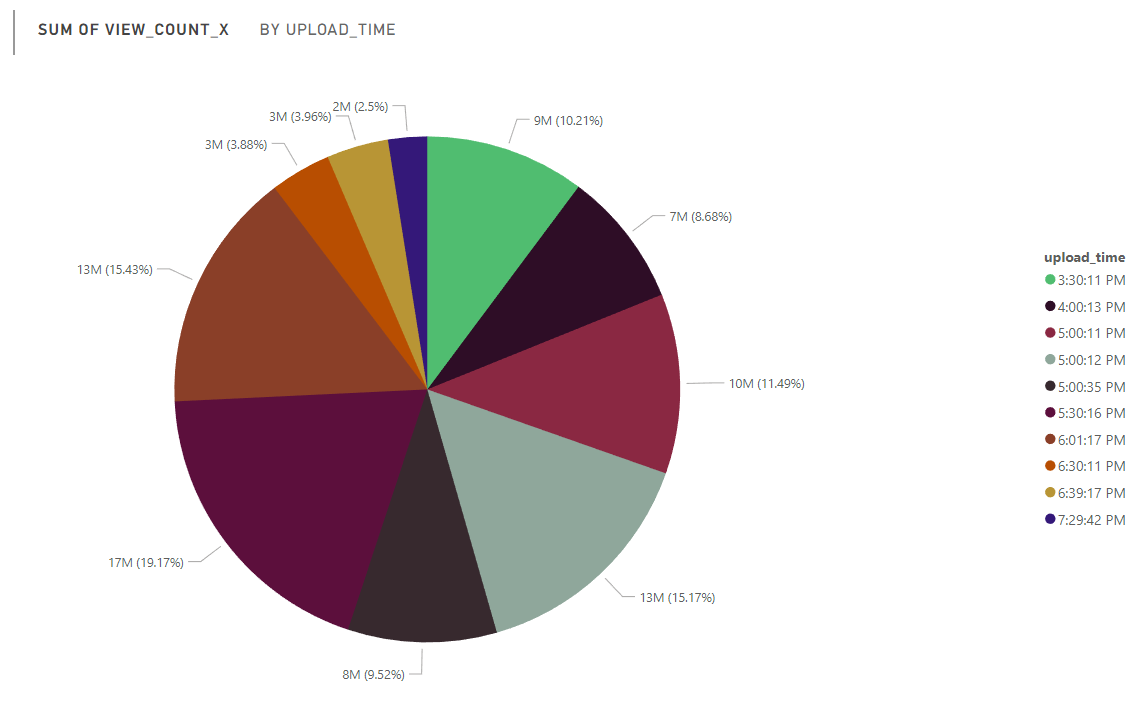

When we visualised the dataframe for the number of views a video garnered based on what time of the day the video was uploaded, we observed that there were a few time frames where a video had a significantly higher chances of achieving more views.

**So, based on the computation, the observations for the best time to upload were as follows:**
1. Around 5:30 PM
2. Around 6 PM
3. Around 5 PM

**By this we can draw observations that, anytime between 5PM - 6PM would be an ideal time for videos to be uploaded to achieve the best results.**

Therefore, 

We can conclude that factors like **the Category of the video, the Duration of the video, the time the video was uploaded** have a contributing factor in whethere the video will trend and achieve more views based on the existing YouTube algorithm.